# Radiation tests data analysis

16/11/2023:

Data analysis from the radiation test done at Franhoffer Institute in Germany. 

Import the needed modules

In [1]:
#%matplotlib notebook
%matplotlib inline
import bz2, os, time
from os import path
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.optimize import curve_fit
import matplotlib.dates as mdate
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image
from IPython.display import display
#from my_funcs import getfiles, natural_sort_key, cumsum_sma

sns.set_context("talk")

PLOT_DIR = Path("./plots")
PLOT_DIR.mkdir(exist_ok=True)

#DATA_DIR = Path("./data/Oszi/step3/")
#DATA_DIR.mkdir(exist_ok=True)

B1500A_DIR = Path("./data/B1500A/step1/")
#B1500A_DIR.mkdir(exist_ok=True)

### 1.- B1500A data analysis

/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

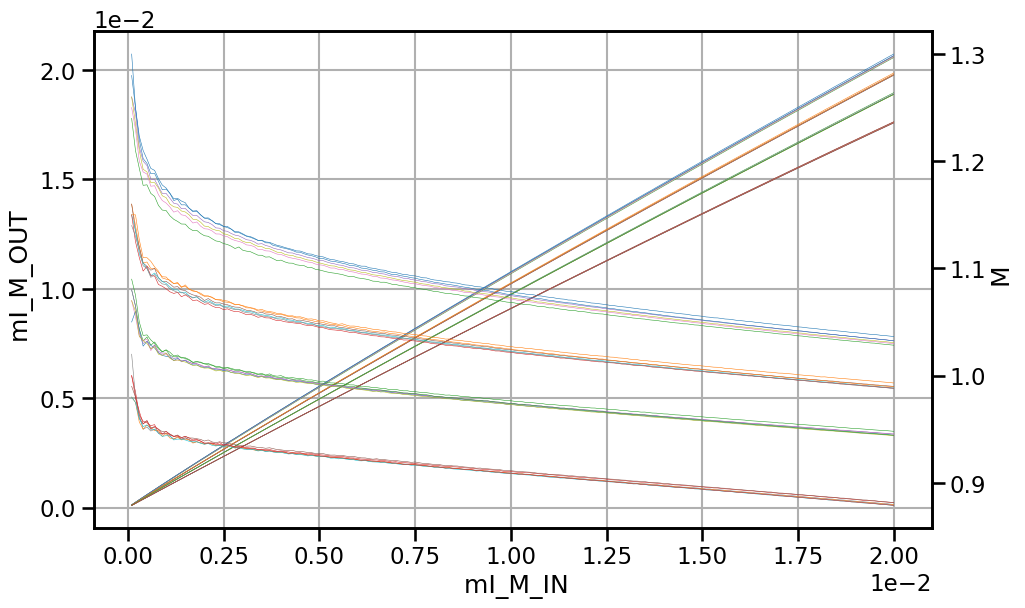

In [2]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("Mirror"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[217])
    
    m_out=np.array_split(df[' mI_M_OUT'], 4)
    m_in=np.array_split(df[' mI_M_IN'], 4)
    m=np.array_split(df[' M'], 4)
    
    
    for i in range(len(m_in)):
        ax1.plot(m_in[i],m_out[i],lw=0.4)
        ax2.plot(m_in[i],m[i],lw=0.4)
        
ax1.set_xlabel(df.columns[8])
ax1.set_ylabel(df.columns[6])#, color=color)   
ax2.set_ylabel(df.columns[5])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 02 NPN1 GP

/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

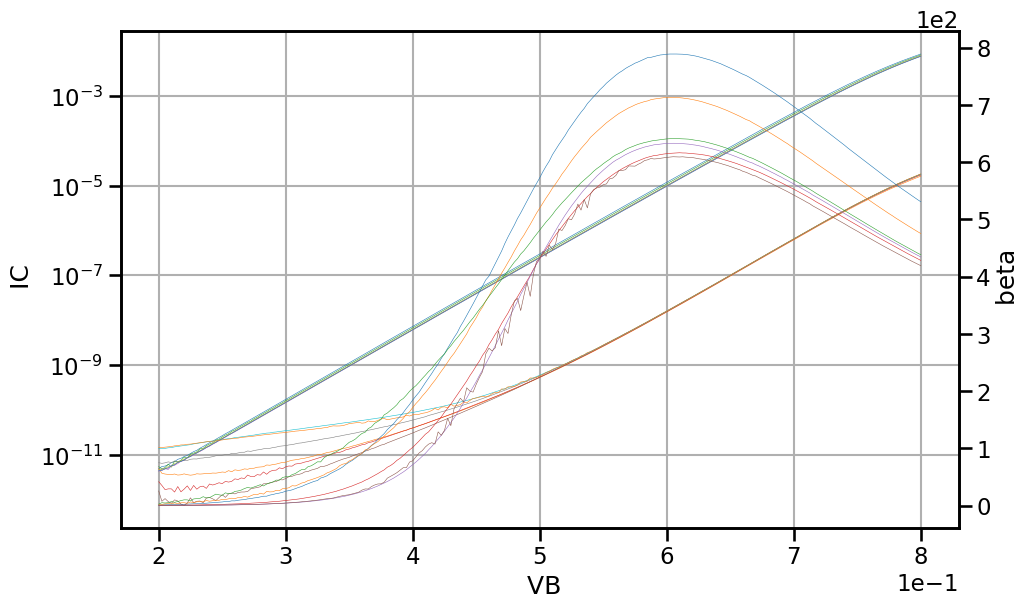

In [3]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NPN1 GP"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[218])
    #print(df.columns)
    
    vb=np.array_split(df[' VB'], 1)
    ic=np.array_split(df[' IC'], 1)
    ib=np.array_split(df[' IB'], 1)
    beta=np.array_split(df[' beta'], 1)
    
    
    for i in range(len(vb)):
        ax1.semilogy(vb[i],ic[i],lw=0.4)
        ax1.semilogy(vb[i],ib[i],lw=0.4)
        ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[3])#, color=color)   
ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 03 NPN1 IC VCE

Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

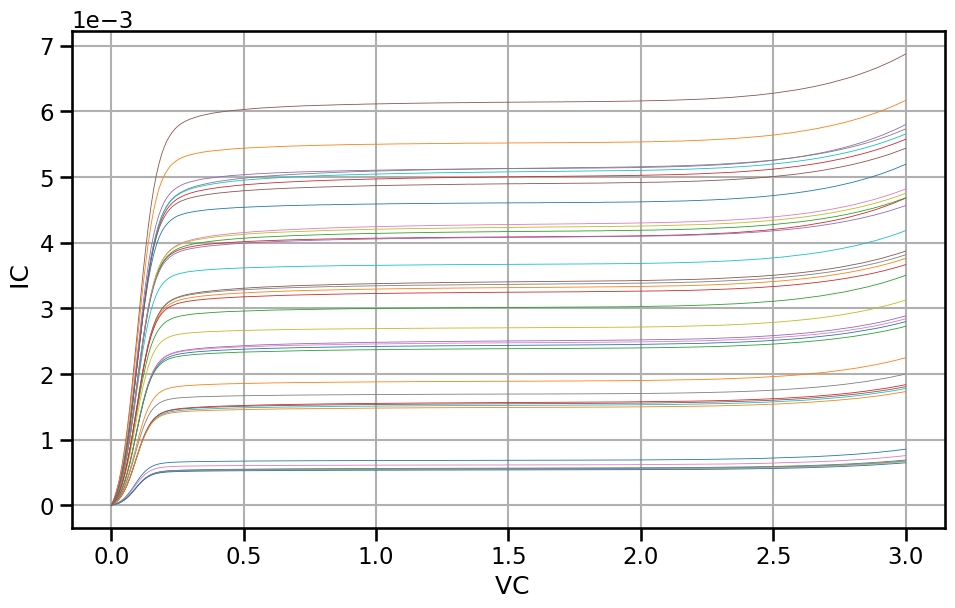

In [4]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NPN1 IC VCE"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[214])
    print(df.columns)
    
    vc=np.array_split(df[' VC'], 6)
    ic=np.array_split(df[' IC'], 6)
        
    for i in range(len(vc)):
        ax1.plot(vc[i],ic[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 04 NPN2 GP

/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

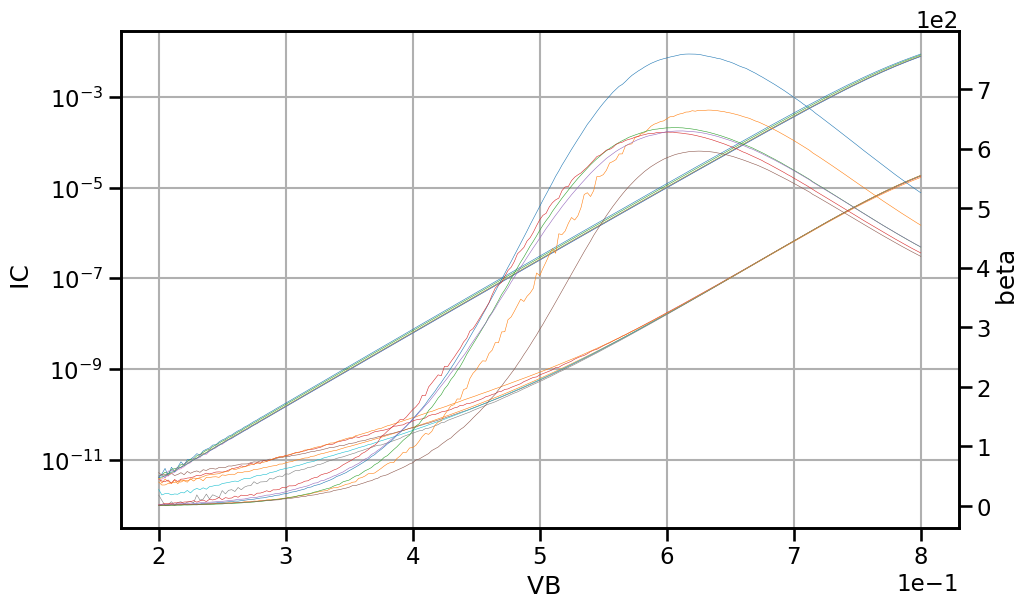

In [5]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NPN2 GP"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[218])
    #print(df.columns)
    
    vb=np.array_split(df[' VB'], 1)
    ic=np.array_split(df[' IC'], 1)
    ib=np.array_split(df[' IB'], 1)
    beta=np.array_split(df[' beta'], 1)
    
    
    for i in range(len(vb)):
        ax1.semilogy(vb[i],ic[i],lw=0.4)
        ax1.semilogy(vb[i],ib[i],lw=0.4)
        ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[3])#, color=color)   
ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 05 NPN2 IC VCE

Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')
Index(['DataName', ' VC', ' IC'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

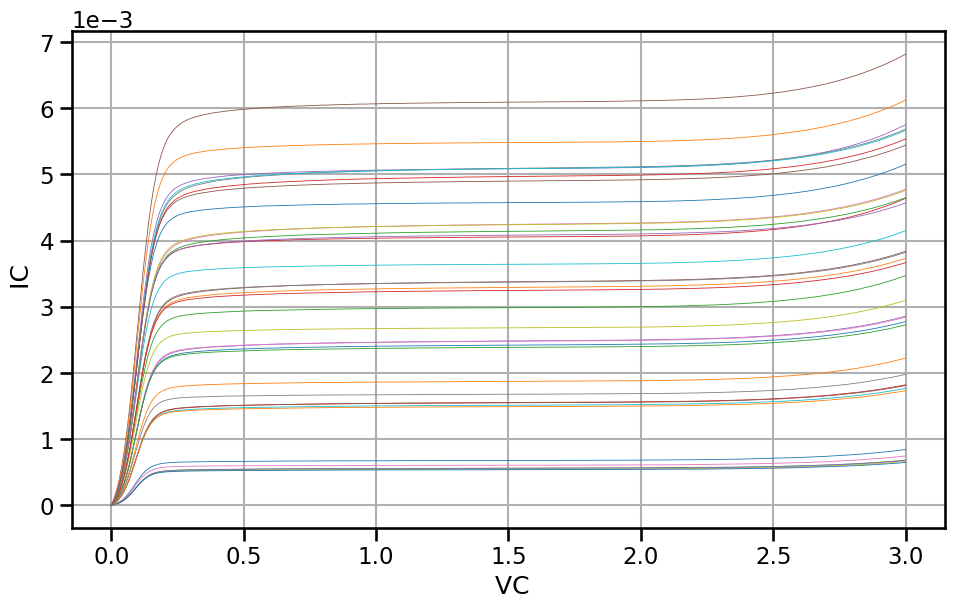

In [6]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NPN2 IC VCE"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[214])
    print(df.columns)
    
    vc=np.array_split(df[' VC'], 6)
    ic=np.array_split(df[' IC'], 6)
        
    for i in range(len(vc)):
        ax1.plot(vc[i],ic[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 06 PNP GP

/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

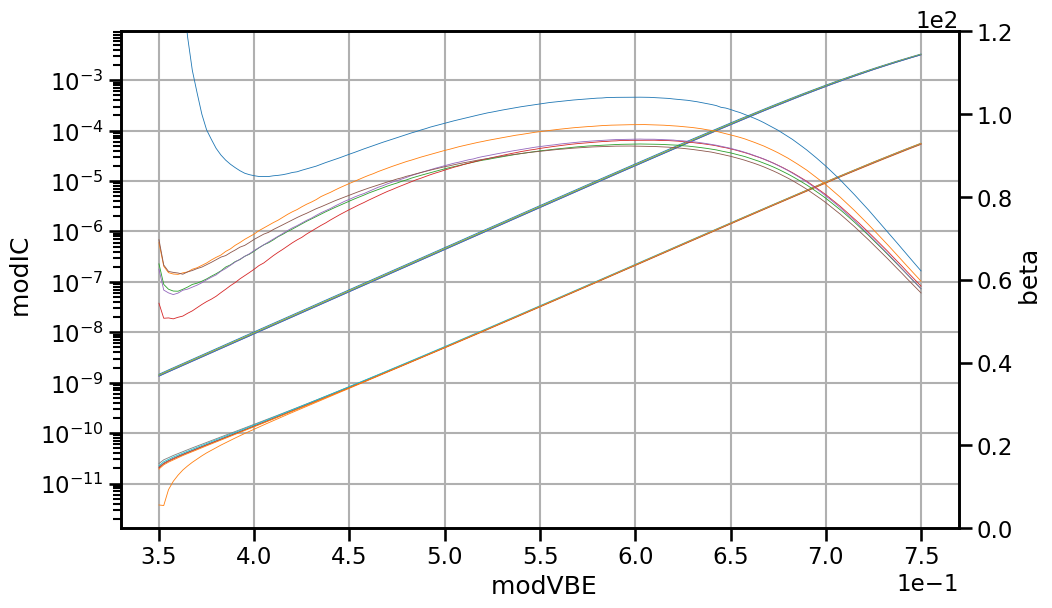

In [7]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("PNP GP"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[218])
    #print(df.columns)
    
    modvbe=np.array_split(df[' modVBE'], 1)
    modic=np.array_split(df[' modIC'], 1)
    modib=np.array_split(df[' modIB'], 1)
    beta=np.array_split(df[' beta'], 1)
    
    
    for i in range(len(modvbe)):
        ax1.semilogy(modvbe[i],modic[i],lw=0.6)
        ax1.semilogy(modvbe[i],modib[i],lw=0.6)
        ax2.plot(modvbe[i],beta[i],lw=0.6)
        
ax1.set_xlabel(df.columns[8])
ax1.set_ylabel(df.columns[7])#, color=color)   
ax2.set_ylabel(df.columns[5])#, color=color)  # we already handled the x-label with ax1
ax2.set_ylim(0,120)
plt.show()

## 07 PNP IC VCE

Index(['DataName', ' VC', ' VE', ' IC', ' modIC', ' modVCE'], dtype='object')
Index(['DataName', ' VC', ' VE', ' IC', ' modIC', ' modVCE'], dtype='object')
Index(['DataName', ' VC', ' VE', ' IC', ' modIC', ' modVCE'], dtype='object')
Index(['DataName', ' VC', ' VE', ' IC', ' modIC', ' modVCE'], dtype='object')
Index(['DataName', ' VC', ' VE', ' IC', ' modIC', ' modVCE'], dtype='object')
Index(['DataName', ' VC', ' VE', ' IC', ' modIC', ' modVCE'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

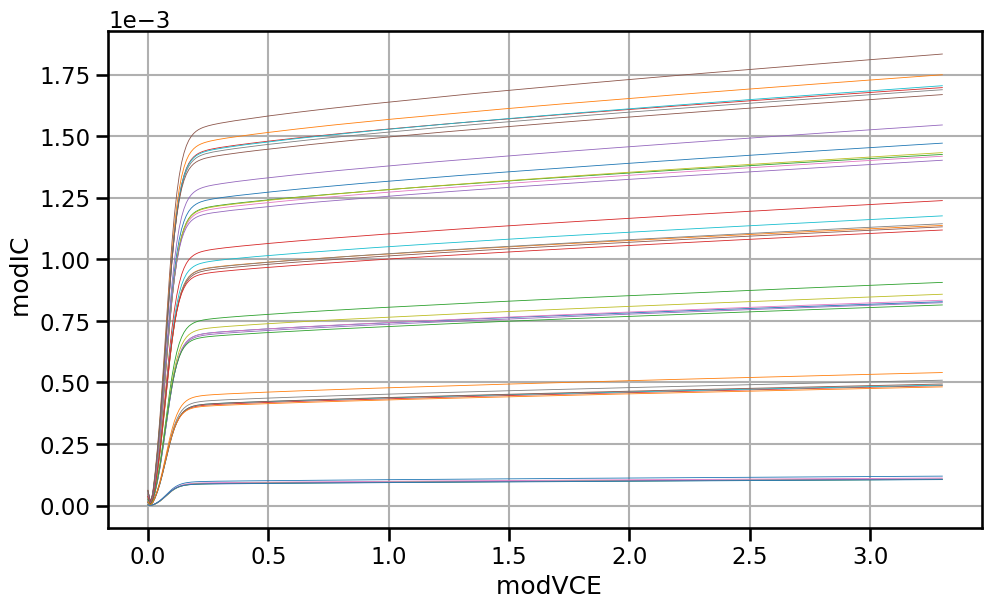

In [8]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("PNP IC VCE"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[217])
    print(df.columns)
    
    modvce=np.array_split(df[' modVCE'], 6)
    modic=np.array_split(df[' modIC'], 6)
        
    for i in range(len(modvce)):
        ax1.plot(modvce[i],modic[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[5])
ax1.set_ylabel(df.columns[4])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 08 NMOS1 ID VGS

Index(['DataName', ' VG', ' ID'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

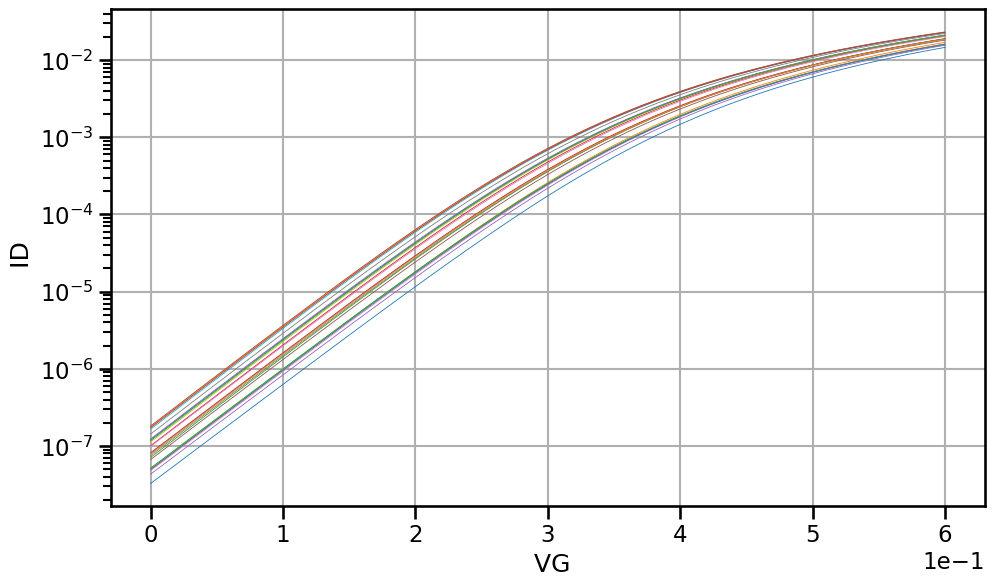

In [9]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NMOS1 ID VGS"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[216])
    print(df.columns)
    
    vg=np.array_split(df[' VG'], 4)
    id=np.array_split(df[' ID'], 4)
        
    for i in range(len(vg)):
        ax1.semilogy(vg[i],id[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 09 NMOS1 ID VDS

Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

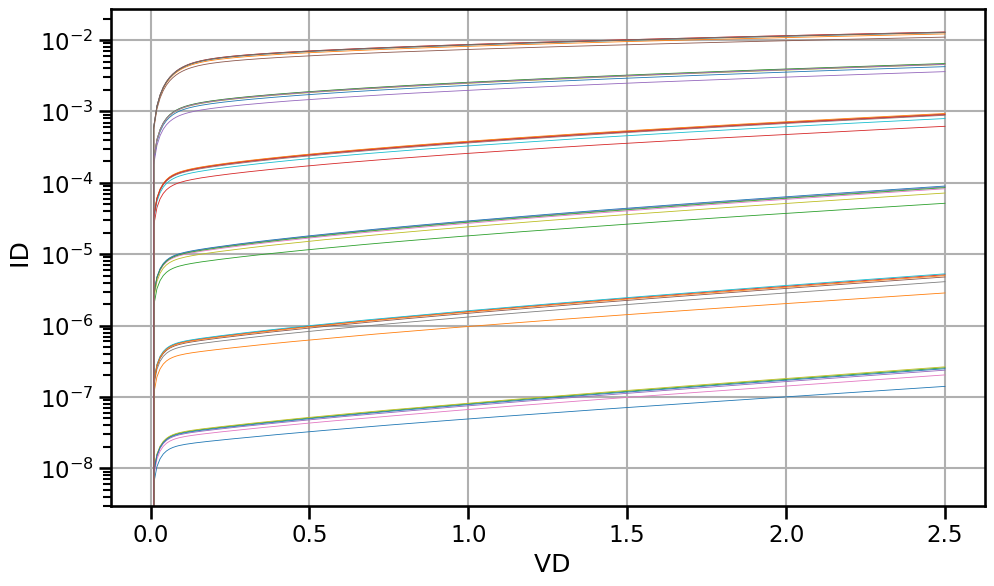

In [10]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NMOS1 ID VDS"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[216])
    print(df.columns)
    
    vd=np.array_split(df[' VD'], 6)
    id=np.array_split(df[' ID'], 6)
        
    for i in range(len(vd)):
        ax1.semilogy(vd[i],id[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 10 NMOS2 ID VGS

Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')
Index(['DataName', ' VG', ' ID'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

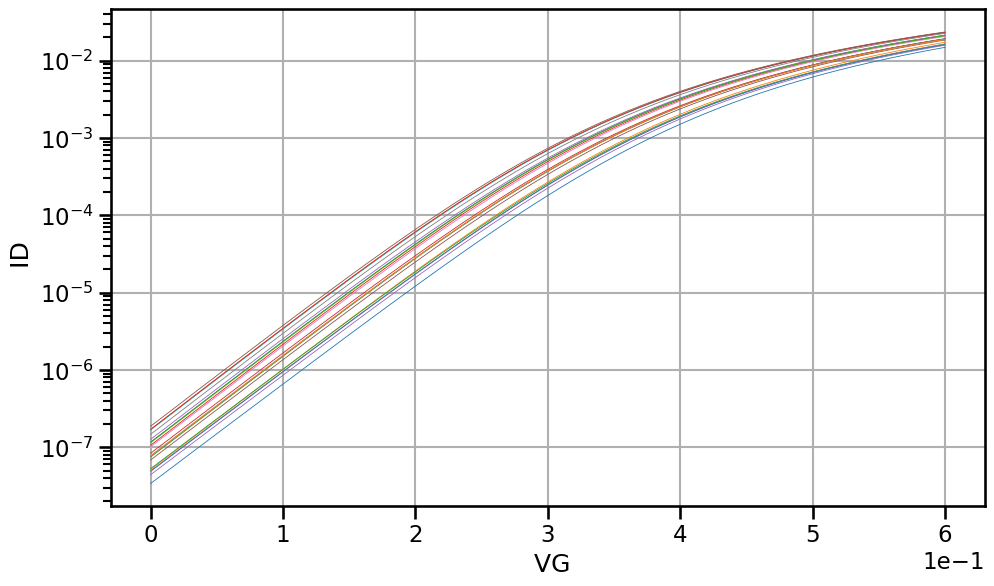

In [11]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NMOS2 ID VGS"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[216])
    print(df.columns)
    
    vg=np.array_split(df[' VG'], 4)
    id=np.array_split(df[' ID'], 4)
        
    for i in range(len(vg)):
        ax1.semilogy(vg[i],id[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 11 NMOS2 ID VDS

Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')
Index(['DataName', ' VD', ' ID'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

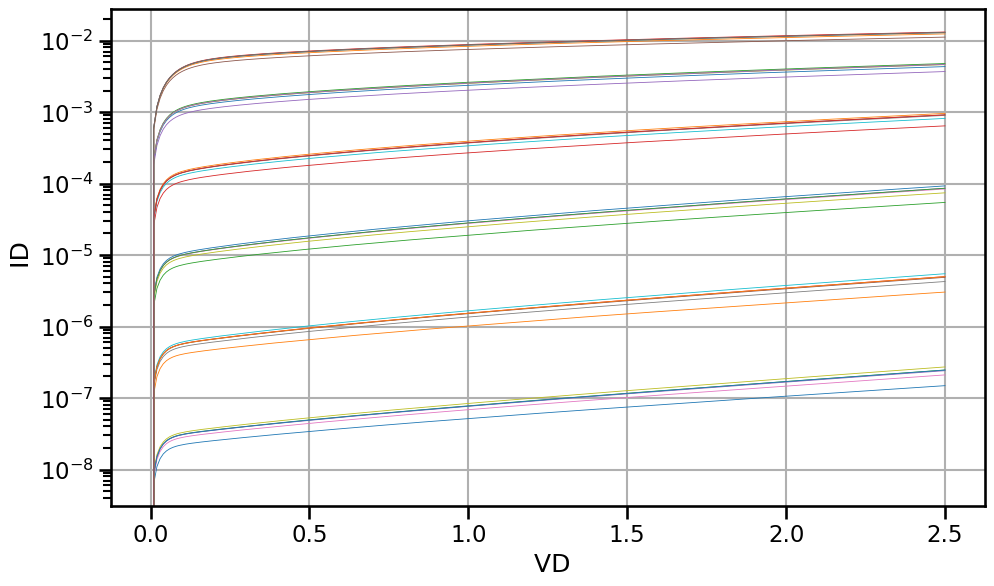

In [12]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("NMOS2 ID VDS"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[216])
    print(df.columns)
    
    vd=np.array_split(df[' VD'], 6)
    id=np.array_split(df[' ID'], 6)
        
    for i in range(len(vd)):
        ax1.semilogy(vd[i],id[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 12 PMOS ID VGS

Index(['DataName', ' VG', ' VS', ' ID', ' mID', ' VGS'], dtype='object')
Index(['DataName', ' VG', ' VS', ' ID', ' mID', ' VGS'], dtype='object')
Index(['DataName', ' VG', ' VS', ' ID', ' mID', ' VGS'], dtype='object')
Index(['DataName', ' VG', ' VS', ' ID', ' mID', ' VGS'], dtype='object')
Index(['DataName', ' VG', ' VS', ' ID', ' mID', ' VGS'], dtype='object')
Index(['DataName', ' VG', ' VS', ' ID', ' mID', ' VGS'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

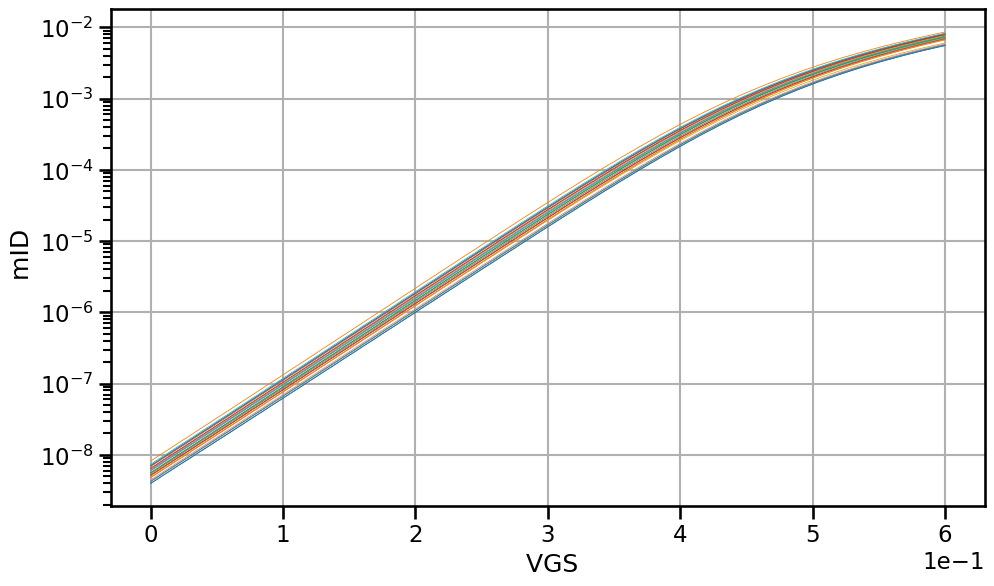

In [13]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("PMOS ID VGS"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[219])
    print(df.columns)
    
    vgs=np.array_split(df[' VGS'], 4)
    mid=np.array_split(df[' mID'], 4)
        
    for i in range(len(vgs)):
        ax1.semilogy(vgs[i],mid[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[5])
ax1.set_ylabel(df.columns[4])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 13 PMOS ID VDS

Index(['DataName', ' VD', ' VS', ' ID', ' mID', ' VDS'], dtype='object')
Index(['DataName', ' VD', ' VS', ' ID', ' mID', ' VDS'], dtype='object')
Index(['DataName', ' VD', ' VS', ' ID', ' mID', ' VDS'], dtype='object')
Index(['DataName', ' VD', ' VS', ' ID', ' mID', ' VDS'], dtype='object')
Index(['DataName', ' VD', ' VS', ' ID', ' mID', ' VDS'], dtype='object')
Index(['DataName', ' VD', ' VS', ' ID', ' mID', ' VDS'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

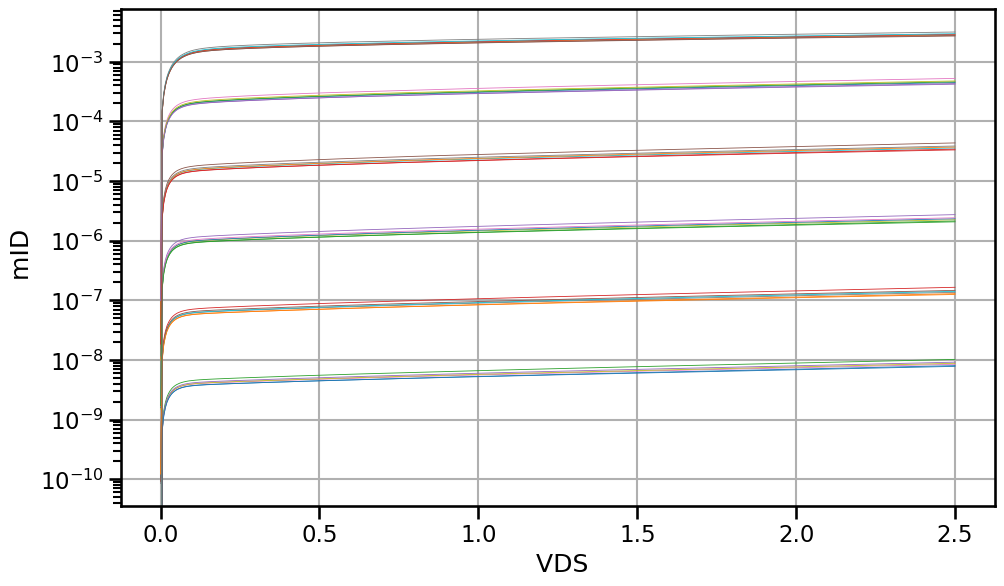

In [14]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("PMOS ID VDS"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[219])
    print(df.columns)

    vds=np.array_split(df[' VDS'], 6)
    mid=np.array_split(df[' mID'], 6)
        
    for i in range(len(vds)):
        ax1.semilogy(vds[i],mid[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[5])
ax1.set_ylabel(df.columns[4])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 14 C leakage

Index(['DataName', ' Vca', ' Ica', ' R'], dtype='object')
Index(['DataName', ' Vca', ' Ica', ' R'], dtype='object')
Index(['DataName', ' Vca', ' Ica', ' R'], dtype='object')
Index(['DataName', ' Vca', ' Ica', ' R'], dtype='object')
Index(['DataName', ' Vca', ' Ica', ' R'], dtype='object')
Index(['DataName', ' Vca', ' Ica', ' R'], dtype='object')


/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/ton/Library/Python/3.9/li

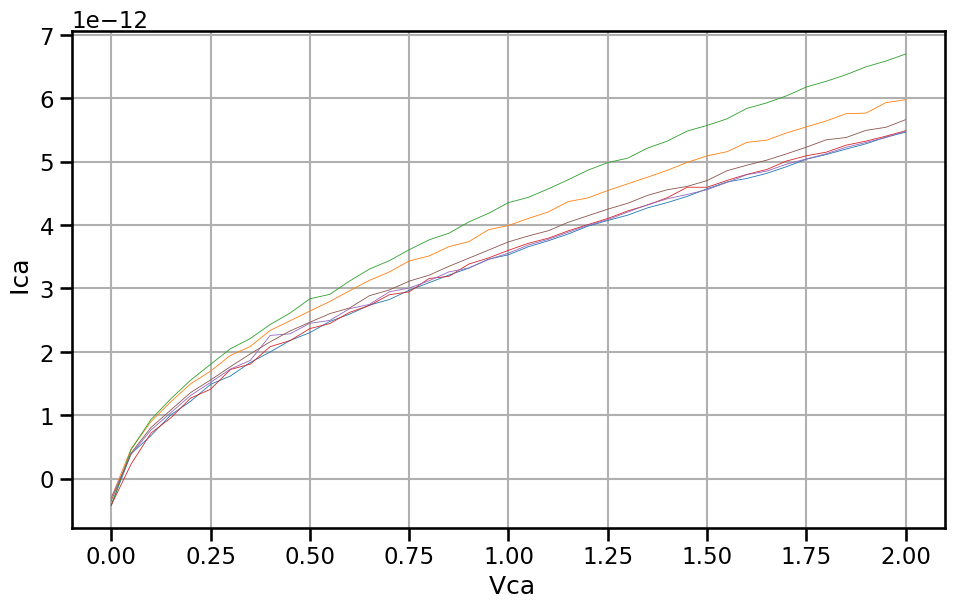

In [15]:
files = []
for file in sorted(os.listdir(B1500A_DIR)):
    if file.startswith("C IV"):
        #print(file)
        files.append(file)
#print(files)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

#ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for file in files:
    df=pd.read_csv(B1500A_DIR / file,header=[214])
    print(df.columns)
    
    vca=np.array_split(df[' Vca'], 1)
    ica=np.array_split(df[' Ica'], 1)
        
    for i in range(len(vca)):
        ax1.plot(vca[i],ica[i],lw=0.6)
        #ax2.plot(vb[i],beta[i],lw=0.4)
        
ax1.set_xlabel(df.columns[1])
ax1.set_ylabel(df.columns[2])#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## Noise analysis

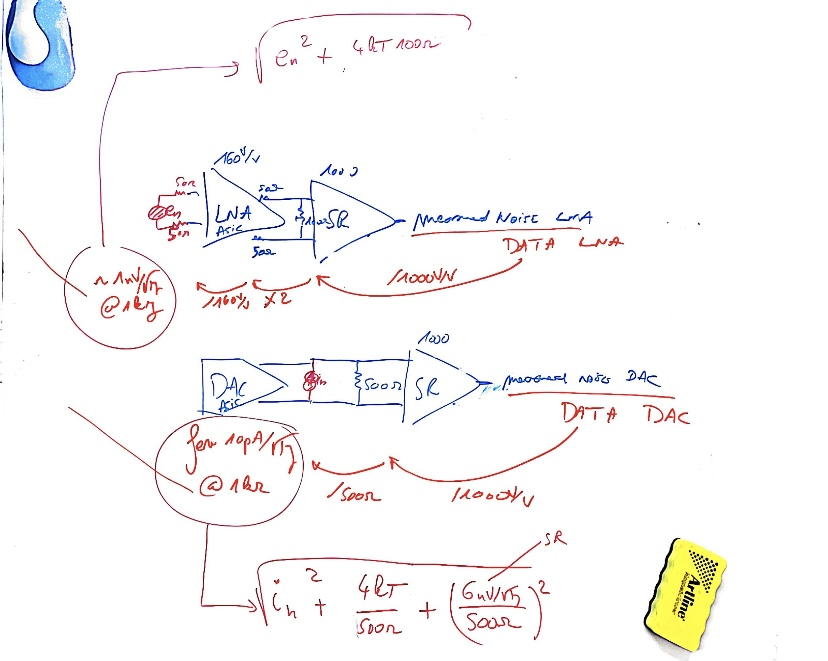

In [16]:
img = Image.open('img/IMG_5794.jpg')
display(img)

* Output data at LNA has been multiplied by 160 times by LNA, then divide by 2 by resistance , multiplied to 1000 by SR. Then to calculate the input noise, we follow the equation
  $$ n_i = \frac{2 \cdot n_{out}}{1000 \cdot 160} = \frac{n_{out}}{80000} $$
  In fact, the noise is the combination of voltage noise $e_n^2$ and thermal noise of resistance, then
  $$ n_i = \sqrt{e_n^2 + 4kT100} = \frac{n_{out}}{80000} \Rightarrow e_n = \sqrt{\frac{n_{out}^2}{80000^2} - 4kT100}  [V/\sqrt{Hz}]$$
  (T is the temperature at room temperature ($300 [K]$), k is the Boltzman constant $1.38e-23 [J/K] $)

* Output data at DAC has been multiplied by $500 \Omega$ resistance to convert from current to voltage, then multiplied by 1000 by SR.To calculate the input noise, we follow the equation
  $$ n_i = \frac{n_{out}}{1000*500} = \frac{n_{out}}{500000} $$
  In fact, the noise is the combination of current noise $i_n^2$ and thermal noise of resistance, then the noise from SR.
  $$ n_i = \sqrt{i_n^2 + \frac{4kT}{500} + (\frac{6e-9}{500})} \Rightarrow i_n = \sqrt{\frac{n_{out}^2}{500000^2} - \frac{4kT}{500} - \frac{6}{500e9}} $$

In [17]:
# Fit function
def fit_noise(f,a,b,c): 
    return a + b*f**a 

## Automatic - In progress...

In [18]:
# #Dir
# DATA_DIR = Path("./data/Oszi/step0/")
# #DATA_DIR.mkdir(exist_ok=True)
# #Read file end with .txt in the folder
# filename = [f for f in os.listdir(DATA_DIR) if f.endswith('.TXT')]

#print(DATA_DIR)
def read_file_name(filename):
    file_name = []#np.zeros(len(filename))
    first = 'Low noise frequency measurement on Board '
    for i in filename:
        number_of_board = i[1]
        if i[2] == 'D':
            type_of_mea = ' DAC '
        else:
            type_of_mea = ' LNA '
        if i[3] == 'H':
            fr = 'High Frequency'
        elif i[3] == 'L':
            fr = 'Low Frequency'
        name = first + number_of_board + type_of_mea + fr
        print(name)
        file_name.append(name)
    
    return file_name
 

#freq, val = np.loadtxt(os.path.join(DATA_DIR, filename), unpack=1 ,encoding='utf-8')
#f = open("os.path.join(DATA_DIR, filename)","w",encoding='utf-8')
#filename

In [20]:

# def plot_data(file_name, number, type, f):
    
#     # number: from 1 to  7 (number the board we use)
#     # type: '['D'] for DAC, ['L'] for LNA, or ['D','L'] for both
#     #f: ['L'] for low frequency, ['H'] for high frequency, ['L','H'] for both

    
#     #Sort the name of file we want
#     plot_arr_name = []
#     name_var = []
#     for name in file_name:
#         if name and name[2] in type and int(name[1]) in number and name[3] in f:
#                 print(name)
#                 plot_arr_name.append(name)
#                 #name_var = plot_arr_name.format(name[:-4])
#                 name_var = [element[:-4] for element in plot_arr_name]
#                 print(name_var)
#                 f = ['f_' + x for x in name_var]
#     #read the file, assign the value with frequency f and var responsible for the array value
#     for i, a in enumerate(plot_arr_name):
#         #freq, val = np.loadtxt(os.path.join(DATA_DIR, filename), unpack=1 ,encoding='utf-8')    
#         exec(f"{f[i]}, {name_var[i]} = np.loadtxt(os.path.join(DATA_DIR, a), unpack=1 ,encoding='utf-8') ")
#         plt.plot(f[i],name_var[i])
    
#     #return {'f': f, 'name_var': name_var}

# def sort_data(DATA_DIR, step, number, type, f):
#     filename = [f for f in os.listdir(DATA_DIR) if f.endswith('.TXT')]
#     # number: from 1 to  7 (number the board we use)
#     # type: '['D'] for DAC, ['L'] for LNA, or ['D','L'] for both
#     #f: ['L'] for low frequency, ['H'] for high frequency, ['L','H'] for both

    
#     #Sort the name of file we want
#     #plot_arr_name = []
#     name_var = []
#     for name in file_name:
#         if name and name[2] in type and int(name[1]) in number and name[3] in f:
#                 name_var.append(name)
#                 #sort it also
#     name_var = sorted(name_var, key=lambda x: int(x[1]))
#     print(name_var)
#     for i in range(len(name_var)):
        
        
#     return name_var

def dat_conv(data, type):
    k = 1.38e-23
    T = 300
    noise = []
    
    if type == 'LNA':
        #noise = [np.sqrt(a**2/80000**2 - 4*k*T*100) for a in data]
        noise = [a/80000 for a in data]
    elif type == 'DAC':
        #noise = [np.sqrt(dat**2/500000**2 - 4*k*T/500 - 6/500e9) for dat in data]
        noise = [(dat/500000) for dat in data]
    
    return noise

    


# Showing the plot



## 1. **Choose step**:

In [47]:
#step = 'step6'
#num = int(step[4])
# DATA_DIR = Path(f"./data/Oszi/{step}/")
DATA_DIR = './data/Oszi/'
#DATA_DIR.mkdir(exist_ok=True)
#Read file end with .txt in the folder
#filename = [f for f in os.listdir(DATA_DIR) if f.endswith('.TXT')]
#print(DATA_DIR)

In [93]:
def dat_conv(data, type):
    k = 1.38e-23
    T = 300
    noise = []
    
    if type == 'LNA':
        #noise = [np.sqrt(a**2/80000**2 - 4*k*T*100) for a in data]
        noise = [a/80000 for a in data]
    elif type == 'DAC':
        #noise = [np.sqrt(dat**2/500000**2 - 4*k*T/500 - 6/500e9) for dat in data]
        noise = [(dat/500000) for dat in data]
    
    return noise

def sort_data(DATA_DIR, step, number, type, f):
    DATA_DIR = DATA_DIR + step + '/'
    DATA_DIR = Path(DATA_DIR)
    
    file_name = [f for f in os.listdir(DATA_DIR) if f.endswith('.TXT')]
    #print('done')
    # number: from 1 to  7 (number the board we use)
    # type: '['D'] for DAC, ['L'] for LNA, or ['D','L'] for both
    #f: ['L'] for low frequency, ['H'] for high frequency, ['L','H'] for both
    
    # DATA_path = 
    #Sort the name of file we want
    #plot_arr_name = []
    name_var = []
    for name in file_name:
        if name and name[2] in type and int(name[1]) in number and name[3] in f:
                name_var.append(name)
                #sort it also
    name_var = sorted(name_var, key=lambda x: int(x[1]))
    #print(name_var)
    f_noise = []
    noise_val = []
    for i in range(len(name_var)):
        # Construct the full file path
        file_path = os.path.join(DATA_DIR, name_var[i])
        
        # Load the data from the file
        f_data, data = np.loadtxt(file_path, unpack=True, encoding='utf-8')
        f_noise.append(f_data)
        if name_var[i][2] == 'L':
            noise_val.append(dat_conv(data, 'LNA'))
        elif name_var[i][2] == 'D':
            noise_val.append(dat_conv(data, 'DAC'))
    print(f'There are {len(name_var)} files in the sorted list, they are {name_var}')
    return f_noise, noise_val, name_var



    

In [94]:
#sort_data(DATA_DIR, 'step1', [1,2,3,4,5,6], ['D'], ['L'])

## 1.1. DAC - LF:

In [101]:
f,val,name_val = sort_data(DATA_DIR, 'step1', [1,2,3,4,5,6], ['D'], ['L'])

There are 6 files in the sorted list, they are ['B1DLF1.TXT', 'B2DLF1.TXT', 'B3DLF1.TXT', 'B4DLF1.TXT', 'B5DLF1.TXT', 'B6DLF1.TXT']


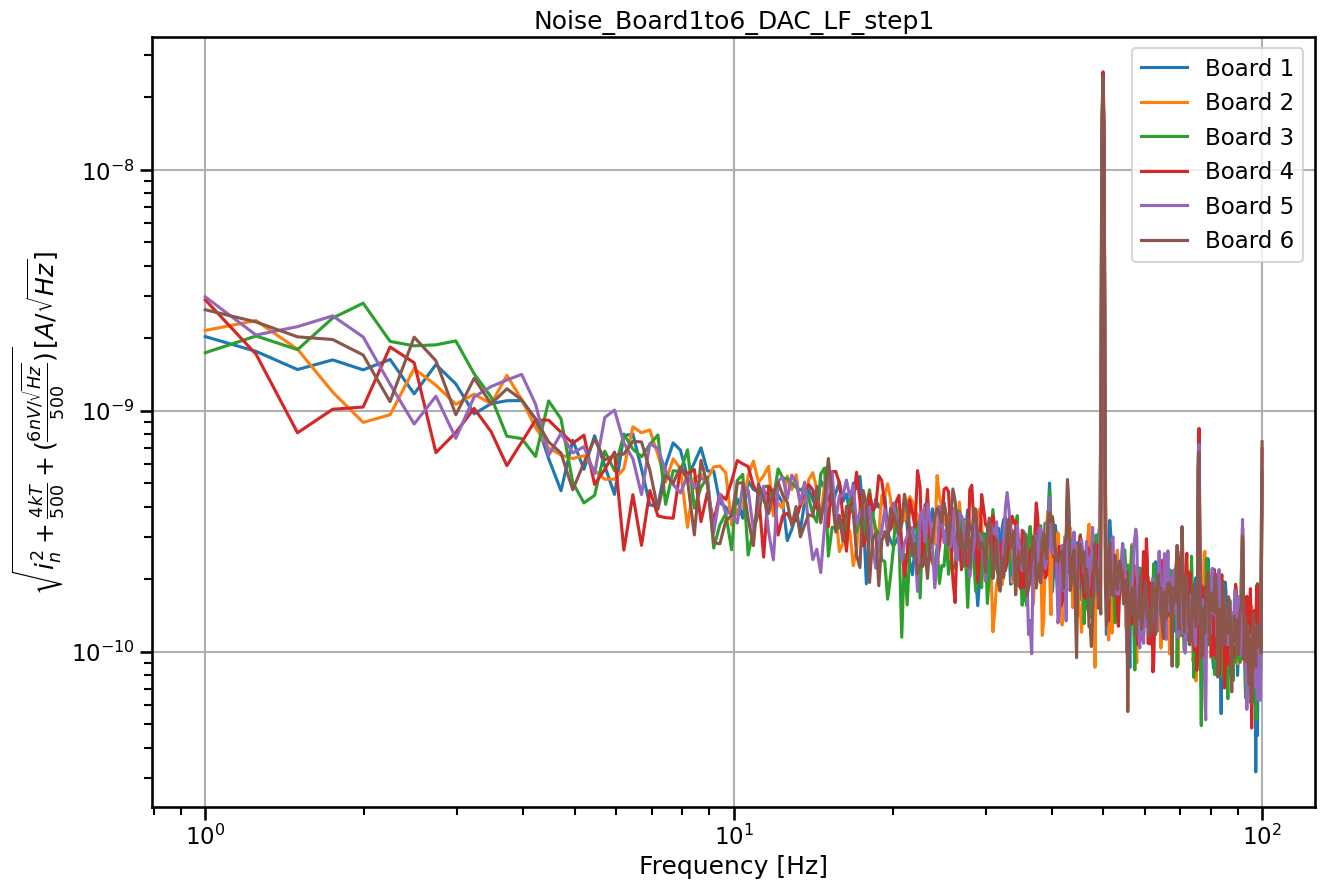

In [104]:
step = 'step' + f'{name_val[0][5]}'
name = f'Noise_Board1to6_DAC_LF_{step}'
plt.figure(figsize = (15,10))
plt.title(f'{name}')
for i in range(len(val)):
    plt.plot(f[i],val[i], label = f'Board {name_val[i][1]}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\sqrt{i_n^2 + \frac{4kT}{500} + (\frac{6nV/\sqrt{Hz}}{500})} [A/\sqrt{Hz}]$')
plt.grid()
plt.legend()
plt.savefig(f'plots/{step}/{name}.png')


## 1.2. DAC, HF:

In [106]:
#sort_data(filename, [1,2,3,4,5,6,7], ['D'], ['H'])
f,val,name_val = sort_data(DATA_DIR, 'step1', [1,2,3,4,5,6], ['D'], ['H'])

There are 6 files in the sorted list, they are ['B1DHF1.TXT', 'B2DHF1.TXT', 'B3DHF1.TXT', 'B4DHF1.TXT', 'B5DHF1.TXT', 'B6DHF1.TXT']


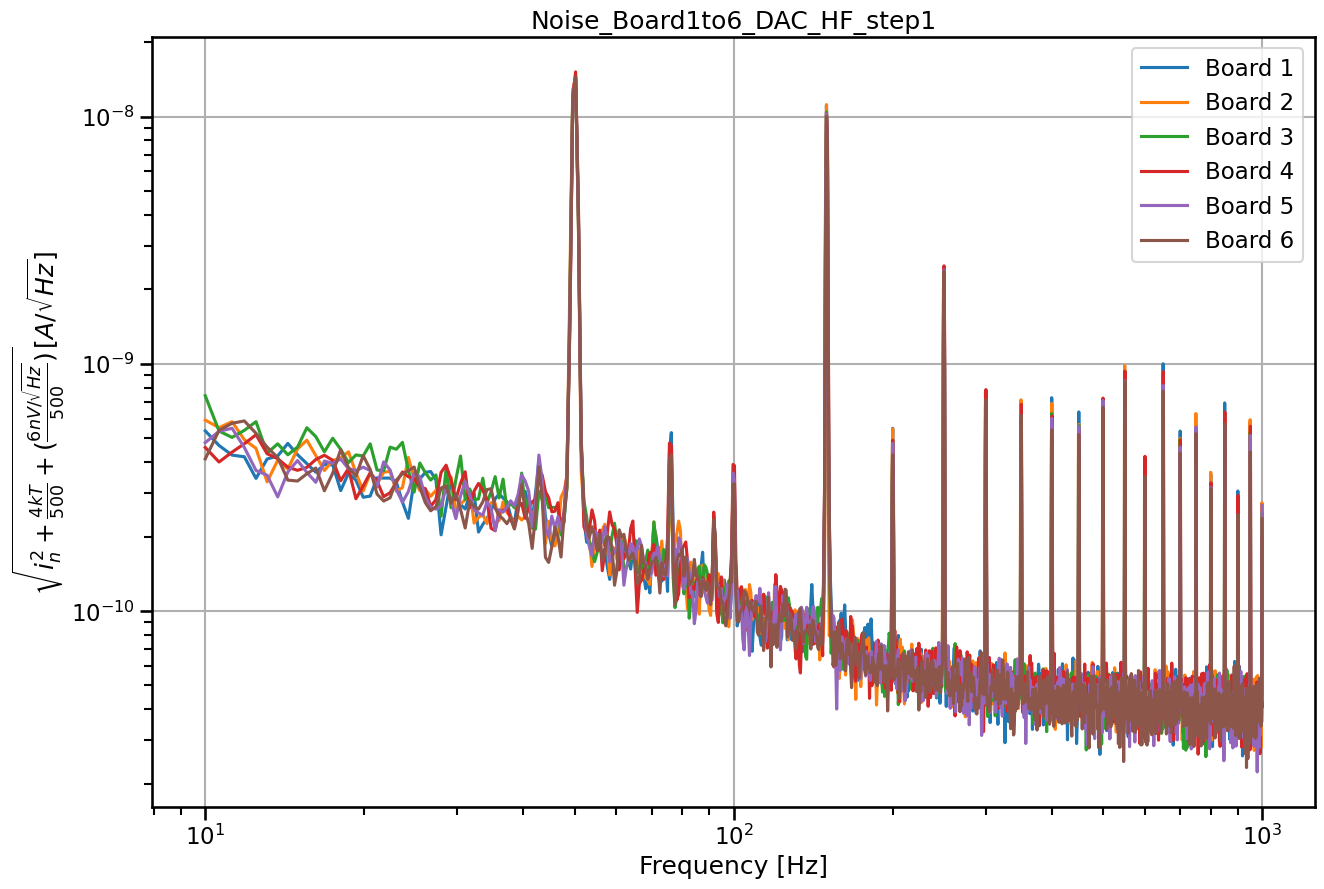

In [107]:
step = 'step' + f'{name_val[0][5]}'
name = f'Noise_Board1to6_DAC_HF_{step}'
plt.figure(figsize = (15,10))
plt.title(f'{name}')
for i in range(len(val)):
    plt.plot(f[i],val[i], label = f'Board {name_val[i][1]}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\sqrt{i_n^2 + \frac{4kT}{500} + (\frac{6nV/\sqrt{Hz}}{500})} [A/\sqrt{Hz}]$')
plt.grid()
plt.legend()
plt.savefig(f'plots/{step}/{name}.png')



## 1.3. DAC, LF - HF:

In [ ]:
name = f'Noise_Board1to6_DAC_LF_HF_{step}'
plt.figure(figsize = (15,10))
plt.title(f'{name}')
plt.plot(f_B1DLF3, dat_conv(B1DLF3,'DAC'), label = 'Board 1 - LF',color = 'b')
plt.plot(f_B1DHF3, dat_conv(B1DHF3,'DAC'), label = 'Board 1 - HF',color = 'b')
plt.plot(f_B2DLF3, dat_conv(B2DLF3,'DAC'), label = 'Board 2 - LF',color = 'g')
plt.plot(f_B2DHF3, dat_conv(B2DHF3,'DAC'), label = 'Board 2 - HF',color = 'g')
plt.plot(f_B3DLF3, dat_conv(B3DLF3,'DAC'), label = 'Board 3 - LF',color = 'r')
plt.plot(f_B3DHF3, dat_conv(B3DHF3,'DAC'), label = 'Board 3 - HF',color = 'r')
plt.plot(f_B4DLF3, dat_conv(B4DLF3,'DAC'), label = 'Board 4 - LF',color = 'c')
plt.plot(f_B4DHF3, dat_conv(B4DHF3,'DAC'), label = 'Board 4 - HF',color = 'c')
plt.plot(f_B5DLF3, dat_conv(B5DLF3,'DAC'), label = 'Board 5 - LF',color = 'm')
plt.plot(f_B5DHF3, dat_conv(B5DHF3,'DAC'), label = 'Board 5 - HF',color = 'm')
plt.plot(f_B6DLF3, dat_conv(B6DLF3,'DAC'), label = 'Board 6 - LF',color = 'y')
plt.plot(f_B6DHF3, dat_conv(B6DHF3,'DAC'), label = 'Board 6 - HF',color = 'y')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\sqrt{i_n^2 + \frac{4kT}{500} + (\frac{6nV/\sqrt{Hz}}{500})} [A/\sqrt{Hz}]$')
plt.grid()
plt.legend()
plt.savefig(f'plots/{step}/{name}.png')


### 1.3.1. DAC, LF - HF - Individual Board

In [ ]:
# name = f'Noise_Board6_DAC_LF_HF_{step}'
# plt.figure(figsize = (15,10))
# plt.title(f'{name}')
# # plt.plot(f_B1DLF3, dat_conv(B1DLF3,'DAC'), label = 'Board 1 - LF',color = 'b')
# # plt.plot(f_B1DHF3, dat_conv(B1DHF3,'DAC'), label = 'Board 1 - HF',color = 'r')
# # plt.plot(f_B2DLF3, dat_conv(B2DLF3,'DAC'), label = 'Board 2 - LF',color = 'b')
# # plt.plot(f_B2DHF3, dat_conv(B2DHF3,'DAC'), label = 'Board 2 - HF',color = 'r')
# # plt.plot(f_B3DLF3, dat_conv(B3DLF3,'DAC'), label = 'Board 3 - LF',color = 'b')
# # plt.plot(f_B3DHF3, dat_conv(B3DHF3,'DAC'), label = 'Board 3 - HF',color = 'r')
# # plt.plot(f_B4DLF3, dat_conv(B4DLF3,'DAC'), label = 'Board 4 - LF',color = 'b')
# # plt.plot(f_B4DHF3, dat_conv(B4DHF3,'DAC'), label = 'Board 4 - HF',color = 'r')
# # plt.plot(f_B5DLF3, dat_conv(B5DLF3,'DAC'), label = 'Board 5 - LF',color = 'b')
# # plt.plot(f_B5DHF3, dat_conv(B5DHF3,'DAC'), label = 'Board 5 - HF',color = 'r')
# # plt.plot(f_B6DLF3, dat_conv(B6DLF3,'DAC'), label = 'Board 6 - LF',color = 'b')
# # plt.plot(f_B6DHF3, dat_conv(B6DHF3,'DAC'), label = 'Board 6 - HF',color = 'r')

# for i in range(6):
#     plt.plot(f_B{i}DLF3, dat_conv(B{i}DLF3,'DAC'), label = f'Board {i} - LF',color = 'b')
#     plt.plot(f_B{i}DHF3, dat_conv(B{i}DHF3,'DAC'), label = f'Board {i} - HF',color = 'r')

# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel(r'$\sqrt{i_n^2 + \frac{4kT}{500} + (\frac{6nV/\sqrt{Hz}}{500})} [A/\sqrt{Hz}]$')
# plt.grid()
# plt.savefig(f'plots/{step}/{name}.png')
# plt.legend()

In [ ]:

for i in range(1, 7):
    plt.figure(figsize=(15, 10))
    name = f'Noise_Board{i}_DAC_LF_HF_{step}'
    plt.title(f'{name}')
    plt.plot(eval(f'f_B{i}DLF3'), dat_conv(eval(f'B{i}DLF3'), 'DAC'), label=f'Board {i} - LF', color='b')
    plt.plot(eval(f'f_B{i}DHF3'), dat_conv(eval(f'B{i}DHF3'), 'DAC'), label=f'Board {i} - HF', color='r')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel(r'$\sqrt{i_n^2 + \frac{4kT}{500} + (\frac{6nV/\sqrt{Hz}}{500})} [A/\sqrt{Hz}]$')
    plt.grid()
    plt.legend()
    plt.savefig(f'plots/{step}/{name}.png')
    
    # plt.clf()


## 1.4. LNA - LF:

In [ ]:
sort_data(filename, [1,2,3,4,5,6,7], ['L'], ['L'])

In [ ]:
f_B1LLF3, B1LLF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B1LLF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B2LLF3, B2LLF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B2LLF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B3LLF3, B3LLF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B3LLF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B4LLF3, B4LLF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B4LLF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B5LLF3, B5LLF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B5LLF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B6LLF3, B6LLF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B6LLF{num}.TXT'), unpack=1 ,encoding='utf-8')

In [ ]:
name = f'Noise_Board1to6_LNA_LF_{step}'
plt.figure(figsize = (15,10))
plt.title(f'{name}')
# plt.plot(f_B1LLF3, dat_conv(B1LLF3,'LNA'), label = 'Board 1')
# plt.plot(f_B2LLF3, dat_conv(B2LLF3,'LNA'), label = 'Board 2')
plt.plot(f_B3LLF3, dat_conv(B3LLF3,'LNA'), label = 'Board 3')
plt.plot(f_B4LLF3, dat_conv(B4LLF3,'LNA'), label = 'Board 4')
plt.plot(f_B5LLF3, dat_conv(B5LLF3,'LNA'), label = 'Board 5')
plt.plot(f_B6LLF3, dat_conv(B6LLF3,'LNA'), label = 'Board 6')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\sqrt{e_n^2 + 4kT100} [V/ \sqrt{Hz}] $')
plt.grid()
plt.legend()
plt.savefig(f'plots/{step}/{name}.png')


## 1.5. LNA -HF:

In [ ]:
sort_data(filename, [1,2,3,4,5,6,7], ['L'], ['H'])

In [ ]:
f_B1LHF3, B1LHF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B1LHF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B2LHF3, B2LHF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B2LHF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B3LHF3, B3LHF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B3LHF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B4LHF3, B4LHF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B4LHF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B5LHF3, B5LHF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B5LHF{num}.TXT'), unpack=1 ,encoding='utf-8')
f_B6LHF3, B6LHF3 =  np.loadtxt(os.path.join(DATA_DIR, f'B6LHF{num}.TXT'), unpack=1 ,encoding='utf-8')

In [ ]:
name = f'Noise_Board1to6_LNA_HF_{step}'
plt.figure(figsize = (15,10))
plt.title(f'{name}')
# plt.plot(f_B1LHF3, dat_conv(B1LHF3,'LNA'), label = 'Board 1')
# plt.plot(f_B2LHF3, dat_conv(B2LHF3,'LNA'), label = 'Board 2')
plt.plot(f_B3LHF3, dat_conv(B3LHF3,'LNA'), label = 'Board 3')
plt.plot(f_B4LHF3, dat_conv(B4LHF3,'LNA'), label = 'Board 4')
plt.plot(f_B5LHF3, dat_conv(B5LHF3,'LNA'), label = 'Board 5')
plt.plot(f_B6LHF3, dat_conv(B6LHF3,'LNA'), label = 'Board 6')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\sqrt{e_n^2 + 4kT100}  [V/ \sqrt{Hz}]$')
plt.grid()
plt.legend()
plt.savefig(f'plots/{step}/{name}.png')


## 1.6. LNA - LF - HF:

In [ ]:
name = f'Noise_Board1to6_LNA_LF_HF_{step}'
plt.figure(figsize = (15,10))
plt.title(f'{name}')
plt.plot(f_B1LLF3, dat_conv(B1LLF3,'LNA'), label = 'Board 1 - LF',color = 'b')
plt.plot(f_B1LHF3, dat_conv(B1LHF3,'LNA'), label = 'Board 1 - HF',color = 'b')
plt.plot(f_B2LLF3, dat_conv(B2LLF3,'LNA'), label = 'Board 2 - LF',color = 'g')
plt.plot(f_B2LHF3, dat_conv(B2LHF3,'LNA'), label = 'Board 2 - HF',color = 'g')
plt.plot(f_B3LLF3, dat_conv(B3LLF3,'LNA'), label = 'Board 3 - LF',color = 'r')
plt.plot(f_B3LHF3, dat_conv(B3LHF3,'LNA'), label = 'Board 3 - HF',color = 'r')
plt.plot(f_B4LLF3, dat_conv(B4LLF3,'LNA'), label = 'Board 4 - LF',color = 'c')
plt.plot(f_B4LHF3, dat_conv(B4LHF3,'LNA'), label = 'Board 4 - HF',color = 'c')
plt.plot(f_B5LLF3, dat_conv(B5LLF3,'LNA'), label = 'Board 5 - LF',color = 'm')
plt.plot(f_B5LHF3, dat_conv(B5LHF3,'LNA'), label = 'Board 5 - HF',color = 'm')
plt.plot(f_B6LLF3, dat_conv(B6LLF3,'LNA'), label = 'Board 6 - LF',color = 'y')
plt.plot(f_B6LHF3, dat_conv(B6LHF3,'LNA'), label = 'Board 6 - HF',color = 'y')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\sqrt{e_n^2 + 4kT100}  [V/ \sqrt{Hz}]$')
plt.grid()
plt.legend()
plt.savefig(f'plots/{step}/{name}.png')


### 1.3.1. DAC, LF - HF - Individual Board

In [ ]:
# step = 'step3'
# name = f'Noise_Board6_LNA_LF_HF_{step}'
# plt.figure(figsize = (15,10))
# plt.title(f'{name}')
# # plt.plot(f_B1LLF3, dat_conv(B1LLF3,'LNA'), label = 'Board 1 - LF',color = 'b')
# # plt.plot(f_B1LHF3, dat_conv(B1LHF3,'LNA'), label = 'Board 1 - HF',color = 'r')
# # plt.plot(f_B2LLF3, dat_conv(B2LLF3,'LNA'), label = 'Board 2 - LF',color = 'b')
# # plt.plot(f_B2LHF3, dat_conv(B2LHF3,'LNA'), label = 'Board 2 - HF',color = 'r')
# # plt.plot(f_B3LLF3, dat_conv(B3LLF3,'LNA'), label = 'Board 3 - LF',color = 'b')
# # plt.plot(f_B3LHF3, dat_conv(B3LHF3,'LNA'), label = 'Board 3 - HF',color = 'r')
# # plt.plot(f_B4LLF3, dat_conv(B4LLF3,'LNA'), label = 'Board 4 - LF',color = 'b')
# # plt.plot(f_B4LHF3, dat_conv(B4LHF3,'LNA'), label = 'Board 4 - HF',color = 'r')
# # plt.plot(f_B5LLF3, dat_conv(B5LLF3,'LNA'), label = 'Board 5 - LF',color = 'b')
# # plt.plot(f_B5LHF3, dat_conv(B5LHF3,'LNA'), label = 'Board 5 - HF',color = 'r')
# plt.plot(f_B6LLF3, dat_conv(B6LLF3,'LNA'), label = 'Board 6 - LF',color = 'b')
# plt.plot(f_B6LHF3, dat_conv(B6LHF3,'LNA'), label = 'Board 6 - HF',color = 'r')
# 3
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel(r'$\sqrt{e_n^2 + 4kT100}  [V/ \sqrt{Hz}]$')
# plt.grid()
# plt.savefig(f'plots/{step}/{name}.png')
# plt.legend()

In [ ]:
for i in range(1, 7):
    plt.figure(figsize=(15, 10))
    name = f'Noise_Board{i}_LNA_LF_HF_{step}'
    plt.title(f'{name}')
    plt.plot(eval(f'f_B{i}LLF3'), dat_conv(eval(f'B{i}LLF3'), 'DAC'), label=f'Board {i} - LF', color='b')
    plt.plot(eval(f'f_B{i}LHF3'), dat_conv(eval(f'B{i}LHF3'), 'DAC'), label=f'Board {i} - HF', color='r')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel(r'$\sqrt{e_n^2 + 4kT100}  [V/ \sqrt{Hz}]$')
    plt.grid()
    plt.legend()
    plt.savefig(f'plots/{step}/{name}.png')
   